In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

Using TensorFlow backend.


In [2]:
data=pd.read_csv('datasets/international-airline-passengers.csv')
data.drop('Month', axis=1, inplace=True)

In [3]:
data.tail()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
139,606
140,508
141,461
142,390
143,432


In [4]:
data=data.values.astype('float')

In [5]:
data
train=data[0:int(0.67*len(data))]
test=data[int(0.67*len(data)):]
train.shape, test.shape

((96, 1), (48, 1))

In [6]:
scaler=MinMaxScaler(feature_range=(0, 1))
train=scaler.fit_transform(train)
test=scaler.transform(test)

In [7]:
def create_dataset(data, k):
    data_X=[]
    data_Y=[]
    for i in range(len(data)-k):
        x=data[i:i+k]
        y=data[i+k, 0]
        data_X.append(x)
        data_Y.append(y)
    return np.array(data_X), np.array(data_Y)

In [8]:
look_back=12
x_train, y_train=create_dataset(train, look_back)
x_test, y_test=create_dataset(test, look_back)

In [9]:
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [10]:
x_train.shape

(84, 12, 1)

In [11]:
model=Sequential()
model.add(SimpleRNN(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=1, validation_data=(x_test, y_test))


Train on 84 samples, validate on 36 samples
Epoch 1/50
84/84 [==============================] - 1s 10ms/step - loss: 0.0151 - accuracy: 0.0119 - val_loss: 0.1689 - val_accuracy: 0.0000e+00
Epoch 2/50
84/84 [==============================] - 0s 5ms/step - loss: 0.0139 - accuracy: 0.0119 - val_loss: 0.1760 - val_accuracy: 0.0000e+00
Epoch 3/50
84/84 [==============================] - 0s 5ms/step - loss: 0.0125 - accuracy: 0.0119 - val_loss: 0.1661 - val_accuracy: 0.0000e+00
Epoch 4/50
84/84 [==============================] - 0s 6ms/step - loss: 0.0118 - accuracy: 0.0119 - val_loss: 0.1425 - val_accuracy: 0.0000e+00
Epoch 5/50
84/84 [==============================] - 0s 5ms/step - loss: 0.0108 - accuracy: 0.0119 - val_loss: 0.1248 - val_accuracy: 0.0000e+00
Epoch 6/50
84/84 [==============================] - 0s 5ms/step - loss: 0.0105 - accuracy: 0.0119 - val_loss: 0.1236 - val_accuracy: 0.0000e+00
Epoch 7/50
84/84 [==============================] - 0s 5ms/step - loss: 0.0102 - accuracy:

In [12]:
model.evaluate(x_test, y_test)

36/36 [==============================] - 0s 250us/step


[0.024921014077133603, 0.0]

In [17]:
test_predict=model.predict(x_test)
test_predict=scaler.inverse_transform(test_predict).ravel()

train_predict=model.predict(x_train)
train_predict=scaler.inverse_transform(train_predict).ravel()

train_true=scaler.inverse_transform([y_train]).ravel()
test_true=scaler.inverse_transform([y_test]).ravel()

In [18]:
test_predict.shape, test_true.shape

((36,), (36,))

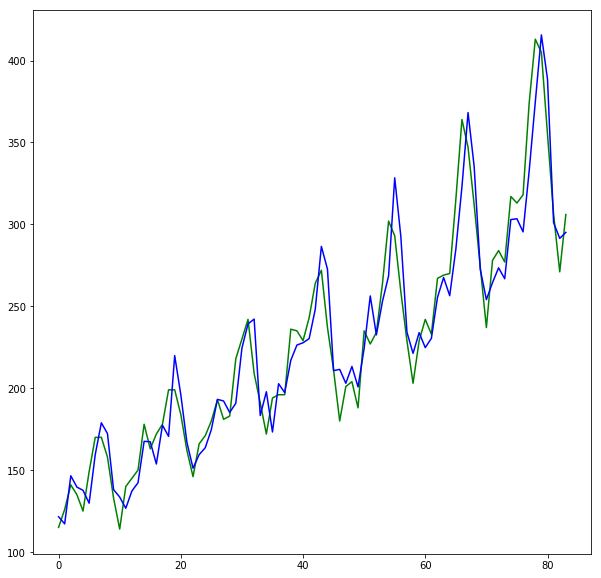

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(train_true, c='g')
plt.plot(train_predict, c='b')
plt.show()

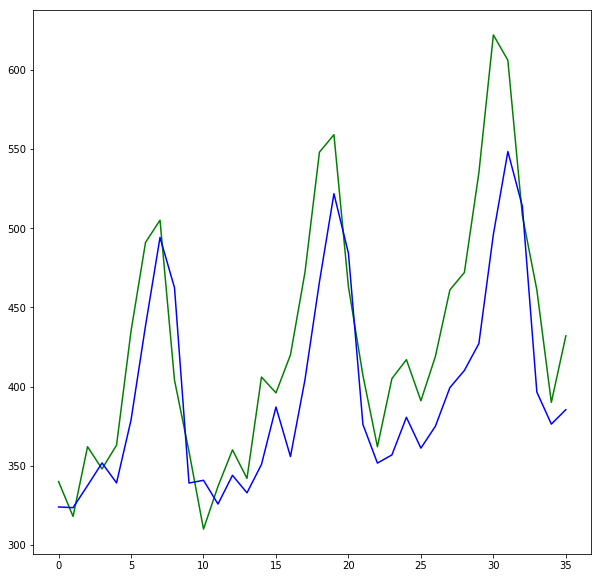

In [22]:
plt.figure(figsize=(10, 10))
plt.plot(test_true, c='g')
plt.plot(test_predict, c='b')
plt.show()